<a href="https://colab.research.google.com/github/sofitacal/TPS/blob/main/Abrir_archivos_MODMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 52.1 MB/s eta 0:00:00


In [ ]:
!pip install yasa


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.7/127.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.3 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import windows
from scipy.fft import fft
import scipy.io
import mne
import yasa

## Lectura del archivo


Formato .mat


In [ ]:
path = '/content/drive/MyDrive/MODMA/EEG_128channels_resting_lanzhou_2015'
arch_mat = scipy.io.loadmat(os.path.join(path,'02010002rest 20150416 1017.mat'))

In [ ]:
arch_mat

{'__header__': b'Net Station 4.0 MAT-file, Platform: MAC2, Created on: 160810/19:58:47.000',
 '__version__': '1.0',
 '__globals__': [],
 'a02010002rest_20150416_1017mat': array([[ -3624.79223633,  -3704.30664062,  -4190.94189453, ...,
          -5223.12841797,  -5200.79931641,  -4696.05371094],
        [ -9476.12402344,  -9431.5390625 ,  -9680.53222656, ...,
         -11130.35253906, -11197.15820312, -10922.54199219],
        [-12770.93457031, -12853.01269531, -13366.35449219, ...,
         -14838.2734375 , -14819.57617188, -14289.99707031],
        ...,
        [ -7359.05615234,  -7436.72753906,  -7820.12939453, ...,
          -9395.24902344,  -9367.8671875 ,  -8997.96191406],
        [ -9285.24121094,  -9363.32714844,  -9708.0703125 , ...,
          -9881.33984375,  -9839.63867188,  -9566.48242188],
        [     0.        ,      0.        ,      0.        , ...,
              0.        ,      0.        ,      0.        ]], dtype='>f8'),
 'samplingRate': array([[250.]], dtype='>f8'),

In [ ]:
print(sorted(arch_mat.keys())) # Imprimo la lista ordenada de las llaves del diccionario

['Impedances_0', '__globals__', '__header__', '__version__', 'a02010002rest_20150416_1017mat', 'samplingRate']


In [ ]:
data_mat = arch_mat['a02010002rest_20150416_1017mat']
data_mat

array([[ -3624.79223633,  -3704.30664062,  -4190.94189453, ...,
         -5223.12841797,  -5200.79931641,  -4696.05371094],
       [ -9476.12402344,  -9431.5390625 ,  -9680.53222656, ...,
        -11130.35253906, -11197.15820312, -10922.54199219],
       [-12770.93457031, -12853.01269531, -13366.35449219, ...,
        -14838.2734375 , -14819.57617188, -14289.99707031],
       ...,
       [ -7359.05615234,  -7436.72753906,  -7820.12939453, ...,
         -9395.24902344,  -9367.8671875 ,  -8997.96191406],
       [ -9285.24121094,  -9363.32714844,  -9708.0703125 , ...,
         -9881.33984375,  -9839.63867188,  -9566.48242188],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]], dtype='>f8')

In [ ]:
type(data_mat)

numpy.ndarray

In [ ]:
data_mat.shape

(129, 75189)

Hay 129 canales con 75189 muestras

In [ ]:
cant_canales_mat = data_mat.shape[0]
cant_canales_mat

129

In [ ]:
cant_muestras_mat = data_mat.shape[1]
cant_muestras_mat

75189

Frecuencia de muestreo


In [ ]:
arch_mat['samplingRate'].shape

(1, 1)

In [ ]:
fs = arch_mat['samplingRate'][0,0]
fs

np.float64(250.0)

A diferencia del ejemplo no dice cuales son los tiempos de cada muestra. Se puede obtener usando np.arange, la cantidad de muestras y la frecuencia de muestreo.

In [ ]:
tiempo = np.arange(cant_muestras_mat) / fs

Vemos si coincide el intervalo de muestreo con la diferencia entre dos tiempos

In [ ]:
1/fs

np.float64(0.004)

In [ ]:
tiempo[100]-tiempo[99]

np.float64(0.0040000000000000036)

¿Cuánto tiempo de señal se registro?

In [ ]:
print('Se registraron', cant_muestras_mat/fs , 'segundos') # divido la cantidad de muestras por la fs para obtenes la cantidad de segundos de registro
print('Se registraron', cant_muestras_mat/fs/60 , 'minutos') # convierto los segundos a minutos

Se registraron 300.756 segundos
Se registraron 5.0126 minutos


## Visualización con MNE

In [ ]:
ch_nombre = [f'data_mat{i}' for i in range(cant_canales_mat)]
ch_types = ['eeg'] * cant_canales_mat

info = mne.create_info(ch_names=ch_nombre, sfreq=fs, ch_types=ch_types)

raw = mne.io.RawArray(data_mat, info)


Creating RawArray with float64 data, n_channels=129, n_times=75189
    Range : 0 ... 75188 =      0.000 ...   300.752 secs
Ready.


In [ ]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: data_mat0, data_mat1, data_mat2, data_mat3, data_mat4, ...
 chs: 129 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 129
 projs: []
 sfreq: 250.0 Hz
>

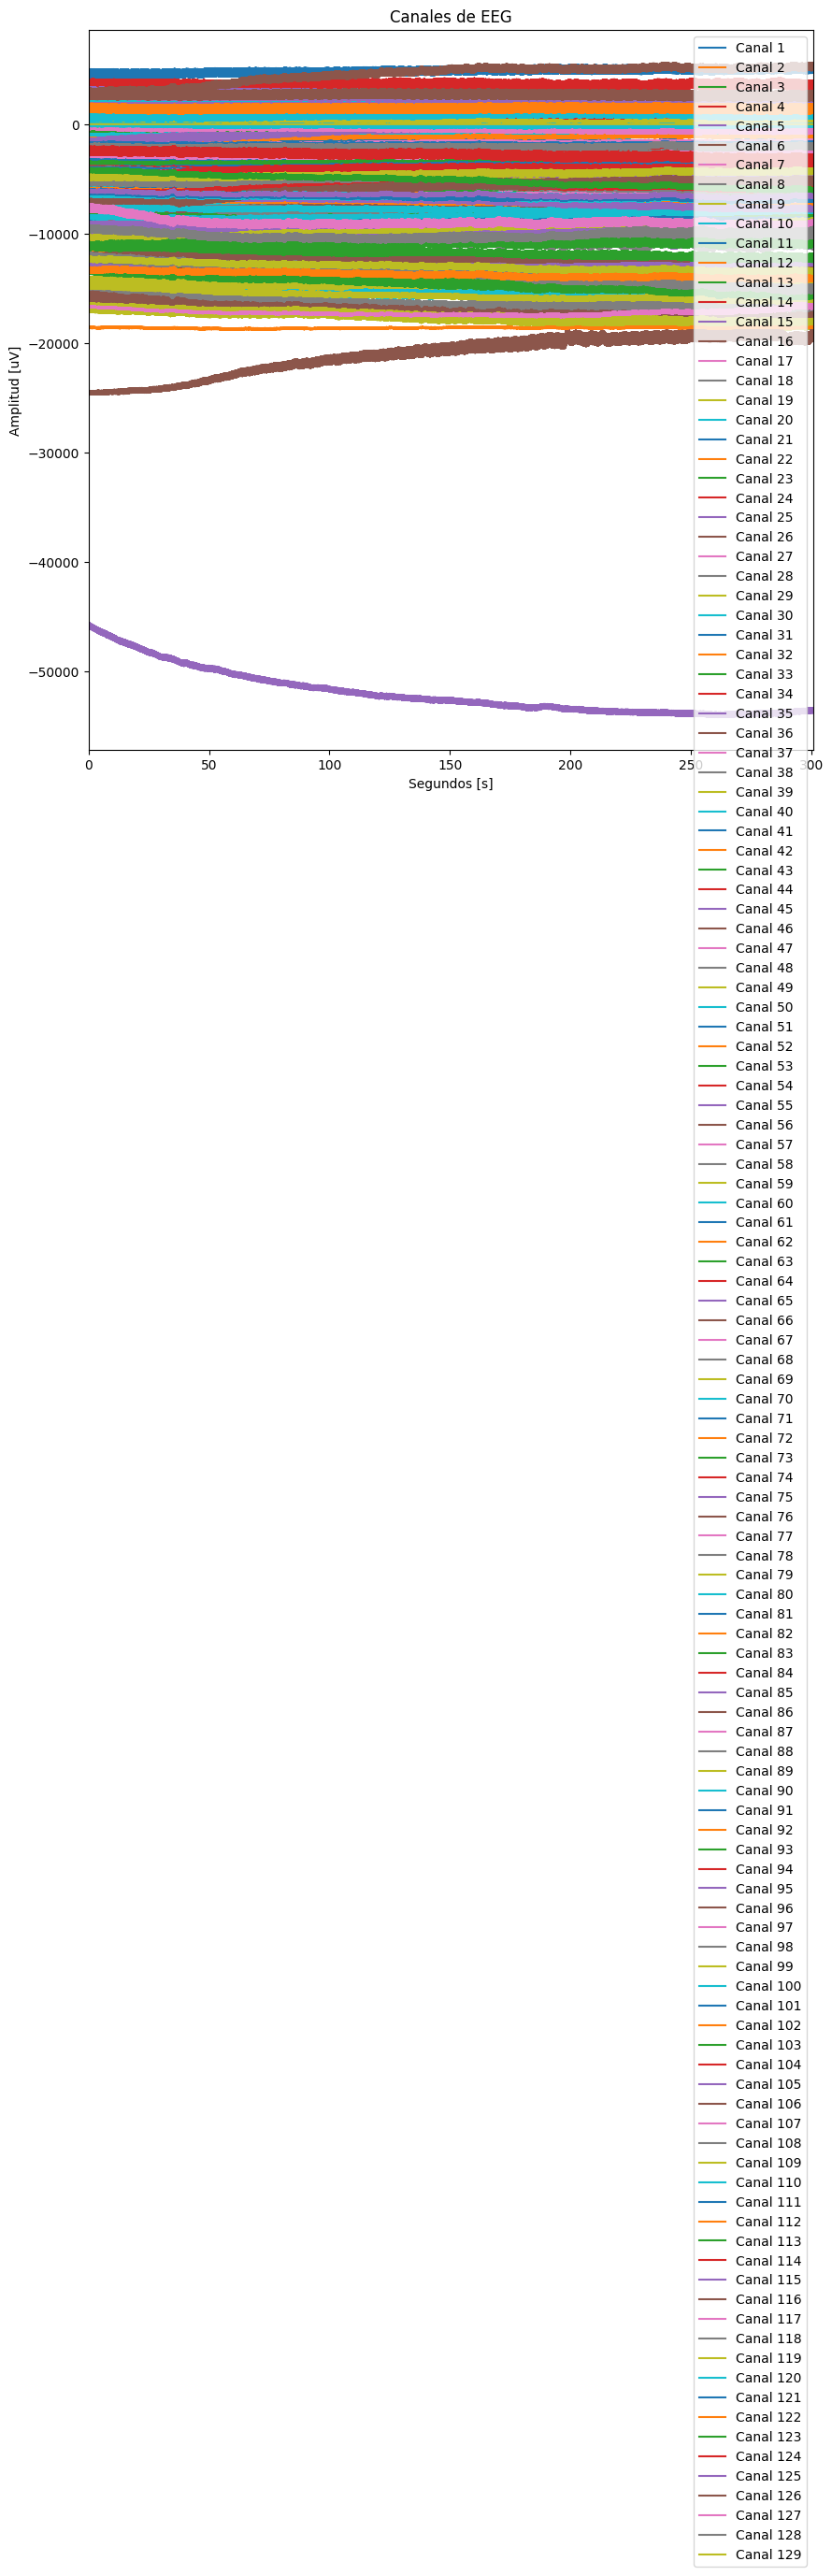

In [ ]:
canales_mat = np.arange(0,cant_canales_mat)+1

plt.figure(figsize=(10,10))
i = 0
spacing = np.ptp(data_mat) * 0.1
for c in canales_mat:
  plt.plot(tiempo, data_mat[c-1], label = f'Canal {c}')
  i += spacing
plt.xlabel('Segundos [s]')
plt.ylabel('Amplitud [uV]')
plt.xlim([tiempo[0],tiempo[-1]])
plt.title('Canales de EEG')
plt.legend(loc = 'upper right')
plt.show()